In [6]:
#import libraries

###
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression

housing_data = pd.read_csv("data.csv") 
housing_dataframe = pd.DataFrame(housing_data)


In [4]:
housing_dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
#head (10 first rows for an idea to actually eyeball data)
housing_dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [22]:
#check last 10 rows
housing_dataframe.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2909,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,NaN
2910,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2911,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2912,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NaN
2913,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [24]:
#check if there is missing value(null) of each column
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [27]:
#check unique of data
for col in housing_dataframe.columns:
    print(col, len(housing_dataframe[col].unique()), housing_dataframe[col].unique())

Id 2919 [   1    2    3 ... 2917 2918 2919]
MSSubClass 16 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
MSZoning 6 ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
LotFrontage 129 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]
LotArea 1951 [ 8450  9600 11250 ...  1894 20000 10441]
Street 2 ['Pave' 'Grvl']
Alley 3 [nan 'Grvl' 'Pave']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 

In [28]:
#check the types of data
housing_dataframe.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

# Visualizations:

Text(0.5, 1.0, 'Sale Type')

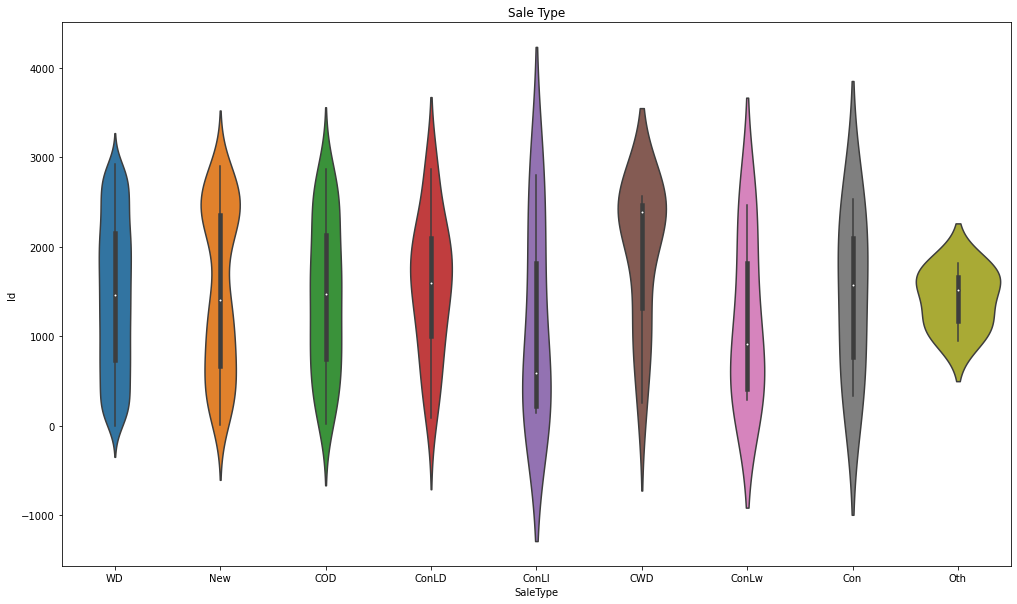

In [41]:
plt.figure(figsize=(17,10))
sns.violinplot(x='SaleType', y='Id', data=housing_dataframe).set_title('Sale Type')

Text(0.5, 1.0, 'Sale Condition')

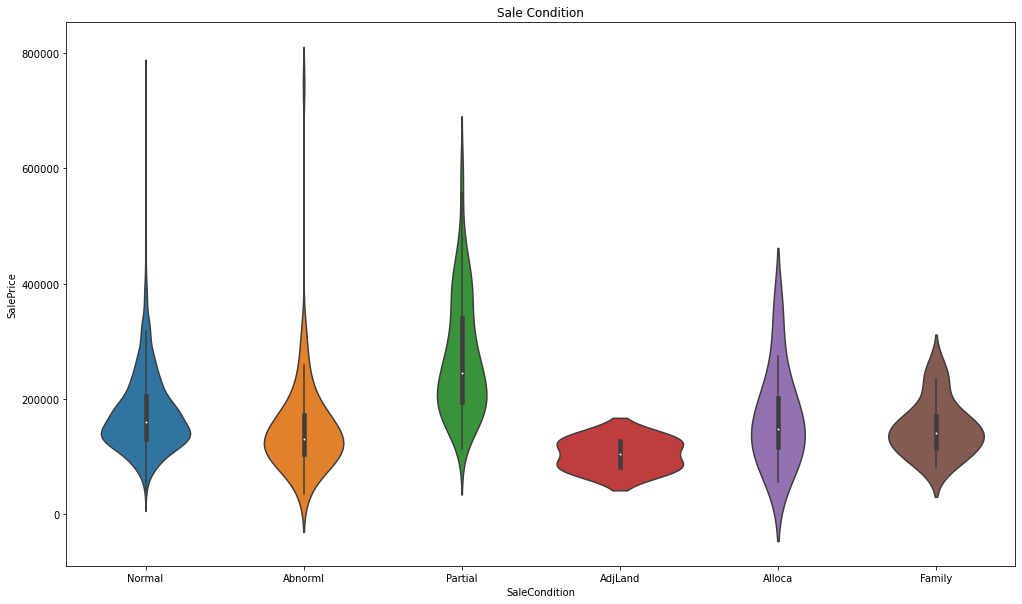

In [97]:

plt.figure(figsize=(17,10))
sns.violinplot(x='SaleCondition', y='SalePrice', data=housing_dataframe).set_title('Sale Condition')

In [44]:
#create date for data
housing_dataframe['Day'] = 1
housing_dataframe['Date'] = housing_dataframe['YrSold'].astype(str) +'-'+housing_dataframe['MoSold'].astype(str)

In [46]:
#convert date from object to date type
housing_dataframe['Date'] = pd.to_datetime(housing_dataframe['Date'])

In [48]:
#check if the date is datetime columns
housing_dataframe.dtypes

Id                        int64
MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
                      ...      
SaleType                 object
SaleCondition            object
SalePrice               float64
Day                       int64
Date             datetime64[ns]
Length: 83, dtype: object

In [63]:
#check the date column
housing_dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Day,Date
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,2008-02-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,2007-05-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,2008-09-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,2006-02-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,2008-12-01
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,1,2009-10-01
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,307000.0,1,2007-08-01
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Shed,350,11,2009,WD,Normal,200000.0,1,2009-11-01
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,1,2008-04-01
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,1,2008,WD,Normal,118000.0,1,2008-01-01


Text(0.5, 1.0, 'Normal Sale Condition')

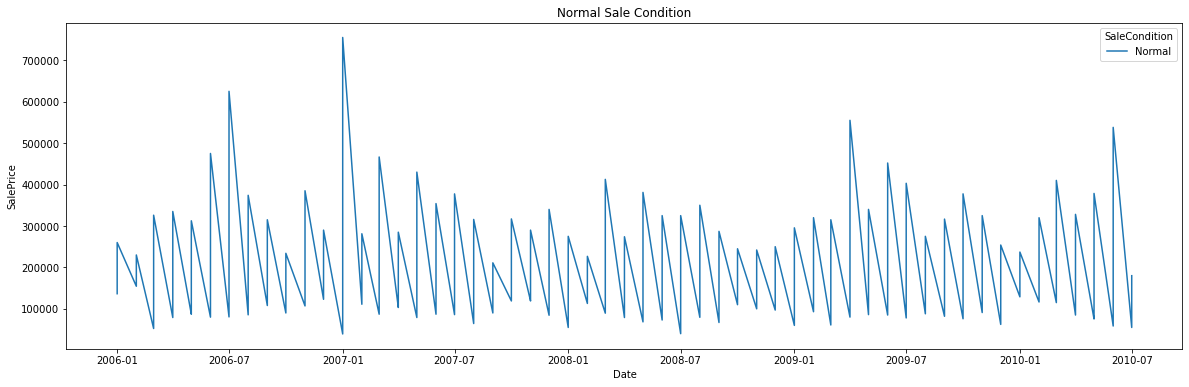

In [56]:
#check the normal condition sale price
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y= 'SalePrice',hue = 'SaleCondition',estimator = None, data = housing_dataframe[housing_dataframe['SaleCondition']=='Normal']).set_title('Normal Sale Condition')

Text(0.5, 1.0, 'Abnormal Sale Condition')

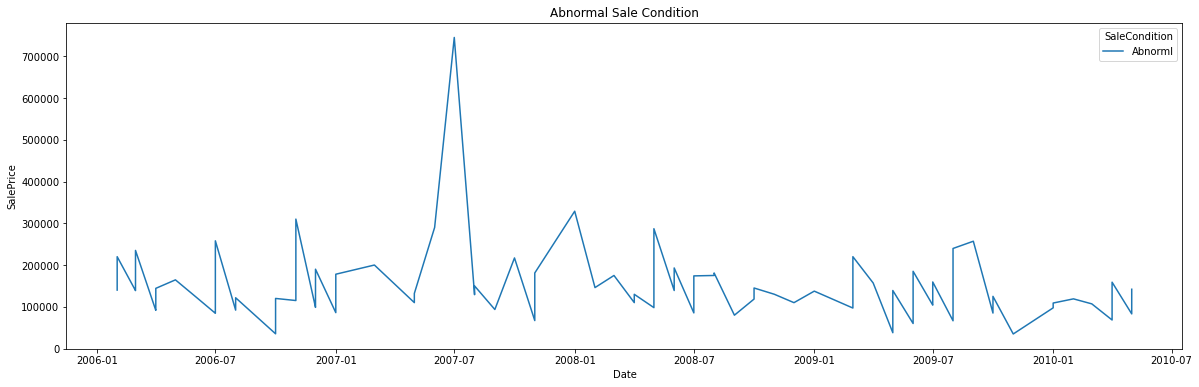

In [58]:
#check the abnormal condition sale price
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y= 'SalePrice',hue = 'SaleCondition',estimator = None, data = housing_dataframe[housing_dataframe['SaleCondition']=='Abnorml']).set_title('Abnormal Sale Condition')

# Linear Regression

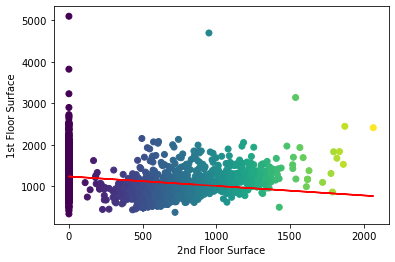

In [111]:
#Linear Regression comparing the first floor and second floor surfaces
X = housing_dataframe.iloc[:, 44].values.reshape(-1, 1)
Y = housing_dataframe.iloc[:, 43].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)# make predictions
plt.xlabel('2nd Floor Surface')
plt.ylabel('1st Floor Surface')
plt.scatter(X, Y, c = X)
plt.plot(X, Y_pred, color='red')
plt.show()

In [66]:
year_2007 = housing_dataframe[housing_dataframe['YrSold'] == 2007]

In [67]:
year_2008 = housing_dataframe[housing_dataframe['YrSold'] == 2008]

In [71]:
sale_2008 = year_2008[['YrSold','MoSold', 'SalePrice']]
clean_2008 = sale_2008.dropna()

In [72]:
sale_2007 = year_2007[['YrSold','MoSold', 'SalePrice']]
clean_2007 = sale_2007.dropna()

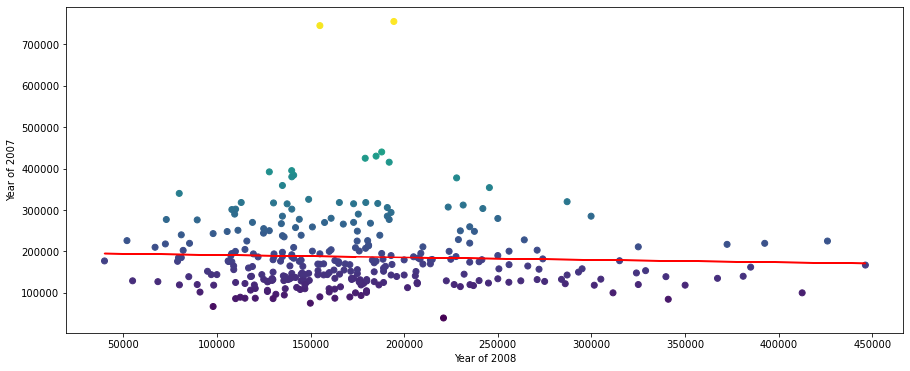

In [96]:
#Linear Regression 
#comparing the sale price for the year of 2007 and 2008
X = clean_2008.iloc[:300, 2].values.reshape(-1, 1)
Y = clean_2007.iloc[:300, 2].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.figure(figsize=(15,6))
plt.scatter(X, Y, c = Y)
plt.plot(X, Y_pred, color= 'red')
plt.xlabel('Year of 2008')
plt.ylabel('Year of 2007')


plt.show()